In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

# path from your drive to data
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/College/Senior_Year/SP/BEM_Ec_120/Project/data/'

sorted_data = WTourneyData = pd.read_csv(path + 'sorted_data.csv', index_col=0)
WTeams = pd.read_csv(path + 'WTeams.csv')

START_SEASON = min(sorted_data['Season'])
END_SEASON = max(sorted_data['Season'])
SEASONS = [*range(START_SEASON, END_SEASON+1)]

TEAMS = WTeams['TeamID']

In [4]:
def get_avg_stat(wstat, lstat):

  res = []

  for year in SEASONS:
    for team in TEAMS:
      games = list(sorted_data.loc[(sorted_data['LTeamID']==team) & (sorted_data['Season']==year)][lstat])
      wins = list(sorted_data.loc[(sorted_data['WTeamID']==team) & (sorted_data['Season']==year)][wstat])
      games.extend(wins)
      if len(games) != 0:
        val = np.mean(games)
      else:
        val = -1
      res.append([team, year, val])
      if (year == 2010 or year == 2013 or year == 2014 or year == 2015 or year == 2016) and team == 3163:
        print("UCONN " + str(year) + ": " + str(val))

      if year == 2011 and team == 3401:
        print("Texas A&M " + str(year) + ": " + str(val))

      if (year == 2012 or year == 2019) and team == 3124:
        print("Baylor " + str(year) + ": " + str(val))

      if (year == 2017 or year == 2022) and team == 3376:
        print("South Carolina " + str(year) + ": " + str(val))

      if year == 2018 and team == 3323:
        print("Notre Dame " + str(year) + ": " + str(val))

      if year == 2021 and team == 3390:
        print("Stanford " + str(year) + ": " + str(val))

      if year == 2023 and team == 3418:
        print("LSU 2023: " + str(val))

    avg_points_dict = {}
    for season in SEASONS:
      avg_points_dict[season] = []

    for team, year, avg_val in res:
      avg_points_dict[year].append(avg_val)

  return res, avg_points_dict

UCONN 2010: 80.92105263157895
Texas A&M 2011: 77.55555555555556
Baylor 2012: 78.1025641025641
UCONN 2013: 82.51282051282051
UCONN 2014: 82.075
UCONN 2015: 89.25641025641026
UCONN 2016: 88.05263157894737
South Carolina 2017: 76.32432432432432
Notre Dame 2018: 85.10526315789474
Baylor 2019: 81.6842105263158
Stanford 2021: 77.72727272727273
South Carolina 2022: 70.89189189189189
LSU 2023: 56.464285714285715


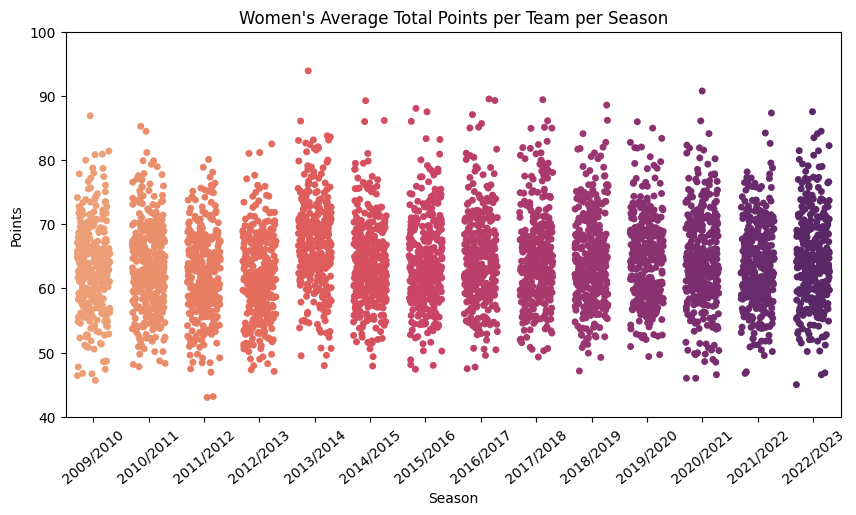

In [11]:
avg_off_efficiency_lst, avg_off_efficiency_dict = get_avg_stat('WScore', 'LScore')

plt.figure(figsize=(10, 5))
plt.title('Women\'s Average Total Points per Team per Season')
plt.xlabel('Year')
plt.ylabel('Points')
plt.xlabel('Season')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],\
           ['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014',\
            '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019',\
            '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
       rotation=40)

plt.ylim(40, 100)
sns.stripplot(data=pd.DataFrame.from_dict(avg_off_efficiency_dict), jitter=0.3, palette='flare')
plt.show()

UCONN 2010: 50.99499524921437
Texas A&M 2011: 45.39084626686606
Baylor 2012: 48.65372133785917
UCONN 2013: 49.605421112565125
UCONN 2014: 50.297870037346044
UCONN 2015: 54.08186961978136
UCONN 2016: 53.03045154723859
South Carolina 2017: 47.64969852737729
Notre Dame 2018: 50.321974553890385
Baylor 2019: 50.53064052453633
Stanford 2021: 46.56088648028695
South Carolina 2022: 43.00218023032549
LSU 2023: 36.359948072950075


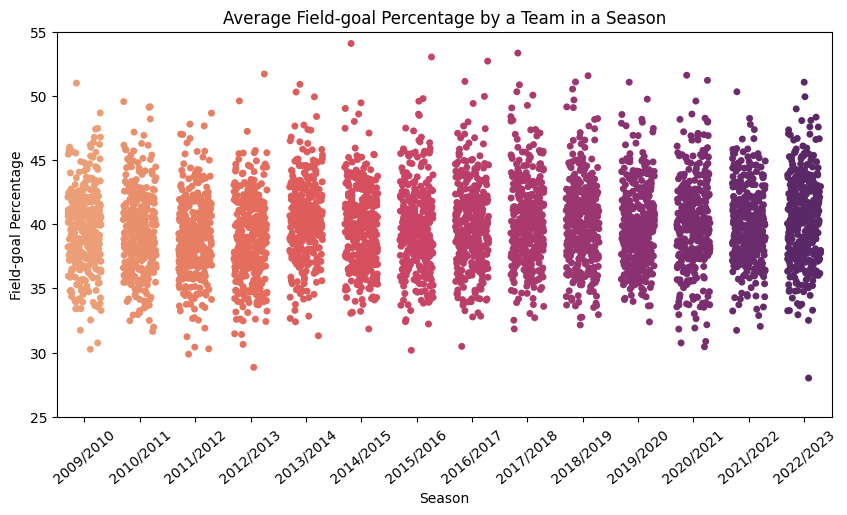

In [13]:
avg_fgp_lst, avg_fgp_dict = get_avg_stat('WFGp', 'LFGp')

plt.figure(figsize=(10, 5))
plt.title('Average Field-goal Percentage by a Team in a Season')
plt.xlabel('Season')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],\
           ['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014',\
            '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019',\
            '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
       rotation=40)

plt.ylabel('Field-goal Percentage')
plt.ylim(25, 55)
sns.stripplot(data=pd.DataFrame.from_dict(avg_fgp_dict), jitter=0.3, palette='flare')
plt.show()

UCONN 2010: 114.2816944767241
Texas A&M 2011: 108.29561605626856
Baylor 2012: 112.4983675740176
UCONN 2013: 117.10811684617448
UCONN 2014: 118.10731367012386
UCONN 2015: 126.75782590014839
UCONN 2016: 124.2298526237304
South Carolina 2017: 110.4114245868213
Notre Dame 2018: 114.46577365260876
Baylor 2019: 112.75124165922175
Stanford 2021: 110.44729481525245
South Carolina 2022: 101.3516759726574
LSU 2023: 81.38959030797322


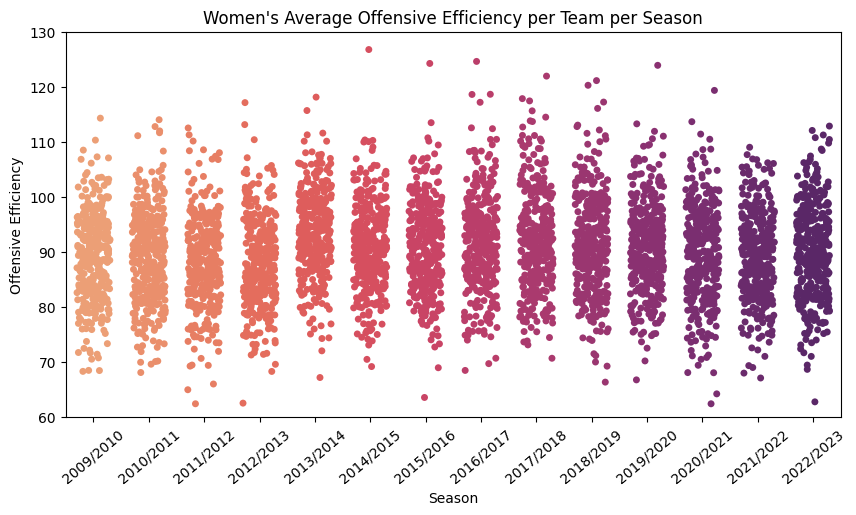

In [7]:
avg_off_efficiency_lst, avg_off_efficiency_dict = get_avg_stat('WOffEff', 'LOffEff')

plt.figure(figsize=(10, 5))
plt.title('Women\'s Average Offensive Efficiency per Team per Season')
plt.xlabel('Season')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],\
           ['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014',\
            '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019',\
            '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
       rotation=40)
plt.ylabel('Offensive Efficiency')
plt.ylim(60, 130)
sns.stripplot(data=pd.DataFrame.from_dict(avg_off_efficiency_dict), jitter=0.3, palette='flare')
plt.show()

UCONN 2010: 65.7296641877437
Texas A&M 2011: 80.58279939546043
Baylor 2012: 75.73617812608725
UCONN 2013: 69.96621394755257
UCONN 2014: 69.28248285411576
UCONN 2015: 68.86618706494235
UCONN 2016: 68.14116733701412
South Carolina 2017: 82.22118475559978
Notre Dame 2018: 92.12515545298298
Baylor 2019: 77.99840379987941
Stanford 2021: 76.37115567946412
South Carolina 2022: 71.88490378794226
LSU 2023: 85.31628965012099


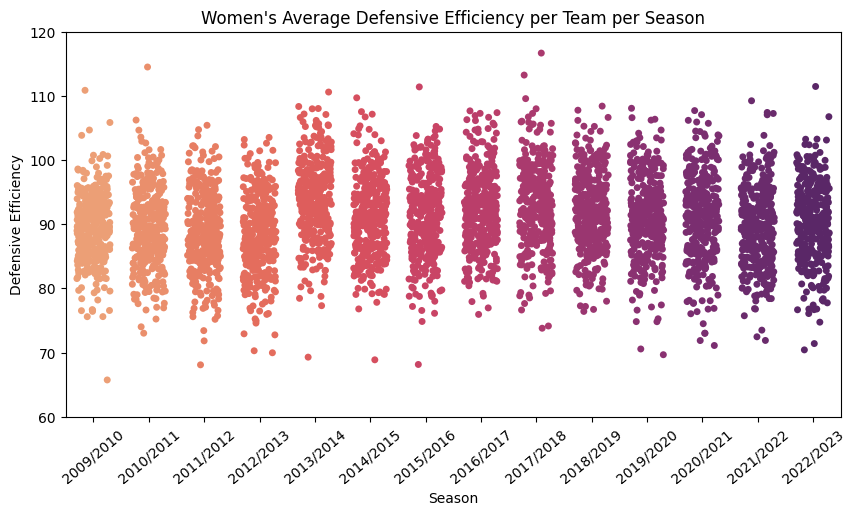

In [8]:
avg_off_efficiency_lst, avg_off_efficiency_dict = get_avg_stat('WDefEff', 'LDefEff')

plt.figure(figsize=(10, 5))
plt.title('Women\'s Average Defensive Efficiency per Team per Season')
plt.xlabel('Season')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],\
           ['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014',\
            '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019',\
            '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
       rotation=40)
plt.ylabel('Defensive Efficiency')
plt.ylim(60, 120)
sns.stripplot(data=pd.DataFrame.from_dict(avg_off_efficiency_dict), jitter=0.3, palette='flare')
plt.show()